# Bellman Ford and SPFA 


In [43]:
from collections import defaultdict
from collections import deque

class Graph:
    """Class representation of Graph"""
    
    def __init__(self, vertices):
        #Number of vertices
        self.V = vertices
        #Defalt Dictionary
        self.graph = []
        
        #Make a deque to hold candidate vertices
        self.Q = deque()
                
    def addEdge(self, x, y, z):
        """Function to add edges to the graph"""
        self.graph.append([x, y, z])
        
    def BellmanFord(self, src):
        """Main function to find the distance from source to all vertices"""
        
        #Initialize dist from src to all oter vertices as Infinity
        dist = [float("Inf")] * self.V
        dist[src] = 0
        
        #Relaxing |V| - 1 vertices
        for i in range(self.V - 1):
            for x,y,z in self.graph:
                if dist[x] != float("Inf") and dist[x] + z < dist[y]:
                    dist[y] = dist[x] + z
        
        
        #Checking for negative weighed cycle
        for x,y,z in self.graph:
            if dist[x] != float("Inf") and dist[x] + z < dist[y]:
                print("Negative Weighed Cycle Present")
                return
        
        #Print all distances
        self.printSol(dist)
        
    def SPFA_FIFO(self, src):
        """First In FIrst Out SPFA"""
        
        #Initialize dist from src to all oter vertices as Infinity
        dist = [float("Inf")] * self.V
        dist[src] = 0
                
        #Initialize the visited node array
        visited = [0] * self.V

        #Add source into the deque as initialization
        self.Q.append(src)
     
        #Relaxing vertices in Q
        while (self.isEmpty()):
            #Pop the vertices from the queue
            x = self.Q.popleft()
            
            #Increment the visited count
            visited[x] = visited[x] + 1
            
            if(visited[x] < self.V):
                #Relax the nodes
                self.relax(dist)
            else:
                print("Negative Cycle Detected")
                return
            
        #Checking for negative weighed cycle
        for x,y,z in self.graph:
            if dist[x] != float("Inf") and dist[x] + z < dist[y]:
                print("Negative Weighed Cycle Present")
                return
        
        #Print all distances
        self.printSol(dist)
        
    def SPFA_LIFO(self, src):
        """Last In First Out SPFA"""
        
        #Initialize dist from src to all oter vertices as Infinity
        dist = [float("Inf")] * self.V
        dist[src] = 0
        
        #Initialize the visited node array
        visited = [0] * self.V

        #Add source into the deque as initialization
        self.Q.append(src)
     
        #Relaxing vertices in Q
        while (self.isEmpty()):
            #Pop the vertex from the queue
            x = self.Q.pop()
            
            #Increment the visited count
            visited[x] = visited[x] + 1;
            
            if (visited[x] < self.V):
                #Relax the nodes
                self.relax(dist)
            else:
                print("Negative Cycle detected")
                return
        
        #Print all distances
        self.printSol(dist)
    
    
        
    def relax(self,dist):
        """Relax the nodes"""
        for x,y,z in self.graph:
                if dist[x] != float("Inf") and dist[x] + z < dist[y]:
                    dist[y] = dist[x] + z
                    if (not(y in self.Q)):
                        self.Q.append(y)
        return dist
        
    def isEmpty(self):
        if self.Q:
            return 1
        else:
            return 0
            
    
    
    def alphaConv(self,i):
        """Converts integers to alphabets"""
        x = i + 65
        return x     
    
    def printSol(self, dist):
        """Function to print the solution"""
        print("Vertix distance from source")
        print("----------------------------")
        print("Vertix \t \t Distance")
        print("------ \t \t --------")
        for i in range(self.V):
            print("  %c \t\t   %d" % ( i+65, dist[i]))
        
    def getVertices(self):
        """Returns the umber of vertices"""
        return (self.V)
    

In [28]:
#Graph1
g = Graph(5) 
g.addEdge(0, 1, -1) 
g.addEdge(0, 2, 4) 
g.addEdge(1, 2, 3) 
g.addEdge(1, 3, 2) 
g.addEdge(1, 4, 2) 
g.addEdge(3, 2, 5) 
g.addEdge(3, 1, 1) 
g.addEdge(4, 3, -3) 

    
#Print the solution 
print("="*30)
print("BellmanFord : ")
print("="*30, "\n")
g.BellmanFord(0) 
print("\n")
print("="*30)
print("FIFO SPFA : ")
print("="*30, "\n")
g.SPFA_FIFO(0)
print("\n")
print("="*30)
print("LIFO SPFA : ")
print("="*30, "\n")
g.SPFA_LIFO(0)
print("\n")

BellmanFord : 

Vertix distance from source
----------------------------
Vertix 	 	 Distance
------ 	 	 --------
  A 		   0
  B 		   -1
  C 		   2
  D 		   -2
  E 		   1


FIFO SPFA : 

Vertix distance from source
----------------------------
Vertix 	 	 Distance
------ 	 	 --------
  A 		   0
  B 		   -1
  C 		   2
  D 		   -2
  E 		   1


LIFO SPFA : 

Vertix distance from source
----------------------------
Vertix 	 	 Distance
------ 	 	 --------
  A 		   0
  B 		   -1
  C 		   2
  D 		   -2
  E 		   1




In [30]:
#Negative Cycle
#Test for Negative Cycle
N = Graph(5) 
N.addEdge(0, 1, 5)
N.addEdge(0, 2, 4)
N.addEdge(1, 3, 3)
N.addEdge(2, 1, -6)
N.addEdge(3, 2, 2)

#Print the solution 
print("="*30)
print("BellmanFord : ")
print("="*30, "\n")
N.BellmanFord(0) 
print("\n")
print("="*30)
print("FIFO SPFA : ")
print("="*30, "\n")
N.SPFA_FIFO(0)
print("\n")
print("="*30)
print("LIFO SPFA : ")
print("="*30, "\n")
N.SPFA_LIFO(0)
print("\n")

BellmanFord : 

Negative Weighed Cycle Present


FIFO SPFA : 

Negative Cycle Detected


LIFO SPFA : 

Negative Cycle detected




In [56]:
#Grid
Grid = Graph(6)
Grid.addEdge(0, 1, 1)
Grid.addEdge(0, 3, 5)
Grid.addEdge(1, 0, 2)
Grid.addEdge(1, 2, 4)
Grid.addEdge(1, 4, 3)
Grid.addEdge(2, 1, 8)
Grid.addEdge(2, 5, 1)
Grid.addEdge(3, 0, 2)
Grid.addEdge(3, 4, 3)
Grid.addEdge(4, 3, 13)
Grid.addEdge(4, 1, 4)
Grid.addEdge(4, 5, 4)
Grid.addEdge(5, 4, 5)
Grid.addEdge(5, 2, 10)

    
#Print the solution 
print("="*30)
print("BellmanFord : ")
print("="*30, "\n")
Grid.BellmanFord(0) 
print("\n")
print("="*30)
print("FIFO SPFA : ")
print("="*30, "\n")
Grid.SPFA_FIFO(0)
print("\n")
print("="*30)
print("LIFO SPFA : ")
print("="*30, "\n")
Grid.SPFA_LIFO(0)
print("\n")

  

BellmanFord : 

Vertix distance from source
----------------------------
Vertix 	 	 Distance
------ 	 	 --------
  A 		   0
  B 		   1
  C 		   5
  D 		   5
  E 		   4
  F 		   6


FIFO SPFA : 

Vertix distance from source
----------------------------
Vertix 	 	 Distance
------ 	 	 --------
  A 		   0
  B 		   1
  C 		   5
  D 		   5
  E 		   4
  F 		   6


LIFO SPFA : 

Vertix distance from source
----------------------------
Vertix 	 	 Distance
------ 	 	 --------
  A 		   0
  B 		   1
  C 		   5
  D 		   5
  E 		   4
  F 		   6




## Display the graph

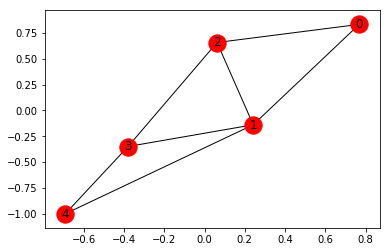

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

P = nx.Graph()

P.add_edge('0','1', weight = 1)
P.add_edge('0','2', weight = 2)
P.add_edge('1','2')
P.add_edge('1','3')
P.add_edge('1','4')
P.add_edge('3','2')
P.add_edge('3','1')
P.add_edge('4','3')
nx.draw_networkx(P)
plt.show()
